# Game Market Analysis

**Project Objective:**

The main objective of this project is to identify patterns that influence the success of video game sales. To do this, we will analyze the data and answer the following research questions:
1. Which gaming platforms have exhibited the highest sales popularity across various time periods?
2. What is the typical time frame for the emergence of new gaming platforms, and when do older platforms phase out?
3. Which platforms are leading in sales, and are they growing or declining?
4. How do user and critic reviews affect sales on one popular platform?
5. Are there genres with high and low sales?
6. What characteristics define the profiles of gaming platform users in North America, Europe, and Japan?
7. Can we assert that the average user ratings for the *Xbox One* and *PC* platforms are equal?
8. Can we assert that the average user ratings for the *Action* and *Sports* genres are distinct?

**Data Source:**

The dataset includes data from open sources, comprising records of game sales, user and expert ratings, genres, and gaming platform popularity spanning the years 1980 to 2016, with incomplete data for the year 2016.

**Tools and libraries:**

- Python
- Pandas
- Matplotlib
- Seaborn
- Numpy

# Исследование маркета видеоигр

**Аннотация проекта** 

На архивных данных о продажах игр, оценках пользователей и экспертов, жанрах и популярности игровых платформ проведём исследование, результаты которого будут учтены при выборе потенциально популярного продукта и планировании рекламных кампаний.


**Цель исследования** — выявить определяющие успешность игры закономерности. Для этого мы проведём анализ данных и ответим на ряд исследовательских вопросов:
- Какие игровые платформы имели наибольшую популярность в плане продаж в разные периоды?
- За какой характерный срок появляются новые и исчезают старые платформы?
- Какие платформы лидируют по продажам, растут или падают?
- Как влияют отзывы пользователей и критиков на продажи внутри одной популярной платформы?
- Выделяются ли жанры с высокими и низкими продажами?
- Какими особенностями представлен портрет пользователей игровых платформ из Северной Америки, Европы и Японии?
- Можно ли сказать, что средние пользовательские рейтинги платформ *Xbox One* и *PC* одинаковые?
- Можно ли сказать, что средние пользовательские рейтинги жанров *Action* и *Sports* разные?

**Ход исследования**
1. Обзор данных.
2. Предобработка данных.
3. Исследовательский анализ данных.

**Описание данных**

Датасет содержит информацию из открытых источников — архив данных о продажах игр, оценках пользователей и экспертов, жанрах и популярности игровых платформ с 1980 по 2016 год. Данные неполные за 2016 год. 

**Инструменты и библиотеки:**
- Python
- Pandas
- Matplotlib
- Seaborn
- Numpy

In [1]:
# импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st
from scipy.stats import binom, poisson, norm
from math import sqrt, factorial

In [2]:
# установим настройки для отображения всех столбцов датафрейма
pd.set_option('display.max_columns', None)

### Шаг 1. Загрузка данных

In [3]:
# считываем данные из csv-файла и сохраняем в датафрейм
df = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

Изучим общую информацию о содержании датасета.

In [4]:
# с помощью метода info() выведем основную информацию о df
# используем sample() для случайной выборки строк из df
df.info()
display(df.sample(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1011,Yoshi,NES,1991.0,Puzzle,0.70,0.13,0.91,0.01,NaN,NaN,NaN
5273,Kinectimals: Now with Bears!,X360,2011.0,Misc,0.27,0.06,0.00,0.03,NaN,NaN,NaN
1927,SoulCalibur III,PS2,2005.0,Fighting,0.74,0.15,0.13,0.05,86.0,8.4,T
4403,Independence Day,PS,1997.0,Shooter,0.25,0.17,0.00,0.03,NaN,NaN,NaN
15651,Miyako,PSP,2010.0,Adventure,0.00,0.00,0.02,0.00,NaN,NaN,NaN
4306,Lego Batman 3: Beyond Gotham,3DS,2014.0,Action,0.21,0.20,0.00,0.04,NaN,6.4,E10+
14826,Warship Gunner 2,PS2,2006.0,Simulation,0.01,0.01,0.00,0.00,62.0,8.5,T
15108,Bella Sara 2 - The Magic of Drasilmare,3DS,2013.0,Adventure,0.00,0.02,0.00,0.00,NaN,NaN,NaN
5441,Banjo-Kazooie: Grunty's Revenge,GBA,2003.0,Platform,0.24,0.09,0.00,0.01,72.0,8.1,E
10563,X-Men: The Official Game,XB,2006.0,Action,0.08,0.02,0.00,0.00,53.0,8.1,T


Итак, в таблице 11 столбцов, 5 из которых имеют числовой тип данных.

Согласно описанию датасет содержит столбцы:
* `Name` — название игры
* `Platform` — платформа  
* `Year_of_Release` — год выпуска
* `Genre` — жанр игры
* `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
* `EU_sales` — продажи в Европе (миллионы проданных копий)
* `JP_sales` — продажи в Японии (миллионы проданных копий)
* `Other_sales` — продажи в других странах (миллионы проданных копий)
* `Critic_Score` — оценка критиков (максимум 100)  
* `User_Score` — оценка пользователей (максимум 10)
* `Rating` — рейтинг от организации ESRB с присвоением игре соответствующей возрастной категории

**Вывод:** 

Основываясь на предварительном обзоре датафрейма отметим следующее:
- Объёма данных достаточно для проверки гипотез исследования.
- При этом количество значений в столбцах различается. Значит, в данных есть пропущенные значения. 
- Столбец `Year_of_Release` необходимо привести к типу даты для исключения возможных ошибок при анализе.
- Названия колонок не соответствуют единообразию стиля.

В этой связи, для дальнейшего анализа необходима предварительная обработка.

### Шаг 2. Подготовка данных

In [5]:
# приведём названия столбцов к единому стилю
df.columns = df.columns.str.lower()
# убедимся, что изменения выполнены корректно
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [6]:
# оценим данные на наличие дубликатов 
print('Количество явных дубликатов:', df.duplicated().sum())

Количество явных дубликатов: 0


In [7]:
# проверим данные на наличие строк неполных дубликатов по ключевым столбцам
print('Количество строк неполных дубликатов:', df.duplicated(subset=['name', 'platform', 'year_of_release']).sum())

Количество строк неполных дубликатов: 2


In [8]:
# рассмотрим повторяющиеся строки, чтобы понять является ли это ошибкой ввода
duplicates = df[df.duplicated(subset=['name', 'platform', 'year_of_release'], keep=False)]
duplicates

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E


По всей видимости это ошибка ввода данных, значит можно удалить одну из строк.

In [9]:
# избавимся от строк дубликатов и проверим результат
df = df.drop_duplicates(subset=['name', 'platform', 'year_of_release'], keep='first')
print('Количество строк неполных дубликатов:', df.duplicated(subset=['name', 'platform', 'year_of_release'], keep=False).sum())

Количество строк неполных дубликатов: 0


In [10]:
# оценим данные на наличие пропущенных значений в столбцах
print('Количество пропусков:')
print(df.isna().sum())

Количество пропусков:
name                  1
platform              0
year_of_release     269
genre                 1
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8577
user_score         6700
rating             6765
dtype: int64


Перед тем как приступить к обработке, оценим долю пропущенных значений по каждому столбцу, чтобы предупредить риски возможных потерь.

In [56]:
# вычислим процент пропусков для каждого столбца
missing_percentage = (df.isnull().mean() * 100).round(2)

# создадим таблицу с результатами
missing_data_info = pd.DataFrame({'Missing Percentage': missing_percentage})
missing_data_info

,Missing Percentage
name,0.00
platform,0.00
year_of_release,0.00
genre,0.00
na_sales,0.00
eu_sales,0.00
jp_sales,0.00
other_sales,0.00
critic_score,51.46
user_score,54.62


**Вывод:**

В шести столбцах есть пропущенные значения. Особенно существенные потери в столбцах `critic_score`, `user_score`, и `rating`.

Пропуски в таблице могли возникнуть по технологическим причинам — при копировании, считывании, смене формата или во время записи данных. Кроме того, нельзя исключать вероятность ошибок вызванных человеческим фактором при внесении данных. Так или иначе, пропущенные значения являются важным сигналом, который следует учитывать. 

На практике было бы правильно установить причину пропусков и восстановить данные. Такой возможности нет в учебном проекте. Поэтому поступим следующим образом:
* заполним пропущенные значения явными обозначениями там, где это возможно
* избавимся от таких строк, если невозможно предложить логичной замены и их удаление не приведёт к существенной потере данных

Рассмотрим столбцы более детально, чтобы определить оптимальный способ обработки пропусков.

In [12]:
# рассмотрим значения в name
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.0,0.08,NaN,NaN,NaN


Невозможно предложить логичной замены названию игры, равно как и направлению жанра. Поэтому, примем решение избавиться от этой строки. Кроме того, удаление одной строки не приведёт к существенной потере данных.

In [13]:
# удалим строки с пропущенными значениями по столбцу name
df = df.dropna(subset=['name'])

In [14]:
# рассмотрим значения в year_of_release
df[df['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


На предыдущем шаге мы оценили долю пропущенных значений и риски возможных потерь по каждому столбцу. 
Доля таких значений по столбцу `year_of_release` составляет 1.61%, что относительно мало. Поэтому удаление этих строк не окажет существенного влияния на дальнейший анализ.

In [15]:
# удалим строки с пропущенными значениями по столбцу year_of_release
# устанавим параметр inplace=True, для изменений в df напрямую
df.dropna(subset=['year_of_release'], inplace=True)

In [16]:
# рассмотрим значения в critic_score
df['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

**Вывод:**

- Столбец хранит информацию с оценками критиков (максимум 100). 
- В данном случае ни среднее ни медиана не могут выступить в качестве адекватной замены прощенных значений. Использование их в качестве замены может некорректно характеризовать данные и приведёт к искажению результатов анализа.
- В случае удаления этих строк, потери составят 51.32%, что недопустимо превышает принятые нормы.
- Можно было бы заполнить пропуски маркерным значением '-1', при этом есть риск исказить выборку. 
- Оставим данные по столбцу в таком виде.

In [17]:
# рассмотрим значения в user_score
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

**Вывод:**

- Столбец хранит информацию с оценками пользователей (максимум 10). 
- Значения в столбце имеют тип 'object'.
- В случае удаления строк с пропусками по столбцу, потери составят 40.09%, что недопустимо превышает принятые нормы.
- Оставим пропуски как есть.
- Встречается аббревиатура 'tbd', которая служит временным заполнителем до тех пор, пока не будут известны или уточнены окончательные детали. В данном случае 'tbd' может обозначать, что оценки не были завершены и будут добавлены позже.
- Преобразуем 'tbd' в NaN, для предупреждения возможных ошибок при анализе.

In [18]:
# преобразуем 'tbd' в NaN, для предупреждения возможных ошибок при анализе
df['user_score'] = df['user_score'].replace('tbd', np.NAN)

In [19]:
# рассмотрим значения в rating
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

**Вывод:**

- Значения в столбце имеют категориальный тип.
- Природа недостающих данных неизвестна.
- В случае удаления строк с пропусками по столбцу, потери составят 40.48%, что недопустимо превышает принятые нормы.
- Заполним пропуски категорией 'Unknown' для представления отсутствующих значений.

In [20]:
# заполним пропуски в rating
df['rating'].fillna('Unknown', inplace=True)

**Преобразование данных в нужные типы**

Использование целых чисел *(int)* или чисел с плавающей запятой *(float)* зависит от характера данных и задач анализа.

В данном случае, столбец `user_score` хранит значения 'object', поэтому для возможности выполнения последующих вычислений необходимо изменить тип данных на числовой формат. Преобразовав тип данных в столбце `user_score` в формат 'float', мы сможем выполнять математические операции.

Кроме того, чтобы ответить на вопрос о том, как влияют отзывы пользователей и критиков на продажи, понадобится сравнение столбцов `critic_score` и `user_score`. Значит следует унифицировать шкалы оценок в сравниваемых колонках.

Значения в `year_of_release` изменим с 'float' на 'int', чтобы предупредить некорректность будущих вычислений.

In [21]:
# преобразуем тип данных в user_score на float
df['user_score'] = df['user_score'].astype(float)

In [22]:
# преобразуем тип данных в year_of_release в числовой
df['year_of_release'] = df['year_of_release'].astype(int)

**Добавим в таблицу новый столбец**

Добавим в таблицу новый столбец со значениями, которые будем использовать при исследовании. В частности, для анализа понадобятся рассчёты суммарных продаж по регионам.

In [23]:
# посчитаем суммарные продажи по регионам и добавим в df столбец total_sales
df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

In [24]:
# оценим df после предобработки данных
df.info()
display(df.sample(10))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int32  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           16443 non-null  object 
 11  total_sales      16443 non-null  float64
dtypes: float64(7), int32(1), object(4)
memory usage: 1.6+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
10513,Uta no Prince-Sama: Music,PSP,2011,Misc,0.00,0.00,0.10,0.00,NaN,NaN,Unknown,0.10
1940,Spore Creatures,DS,2008,Simulation,0.66,0.30,0.00,0.10,65.0,6.5,E,1.06
2154,Gangs of London,PSP,2006,Adventure,0.30,0.43,0.00,0.22,52.0,6.7,M,0.95
14266,Shining Stars,DS,2008,Action,0.03,0.00,0.00,0.00,NaN,NaN,Unknown,0.03
15375,Homeworld,PC,1998,Strategy,0.00,0.02,0.00,0.00,93.0,9.0,E,0.02
1500,Rugrats Studio Tour,PS,1999,Adventure,0.57,0.67,0.00,0.07,NaN,NaN,Unknown,1.31
13399,Super Bubble Pop,GC,2003,Puzzle,0.04,0.01,0.00,0.00,54.0,NaN,E,0.05
11116,No More Heroes: Red Zone,PS3,2011,Action,0.00,0.00,0.09,0.00,NaN,NaN,Unknown,0.09
3322,Tony Hawk's Underground,GBA,2003,Sports,0.43,0.16,0.00,0.01,86.0,7.7,E,0.60
14337,F1 2016 (Codemasters),PC,2016,Racing,0.00,0.03,0.00,0.00,NaN,NaN,Unknown,0.03


**Вывод:**

На подготовительном этапе мы изучили основные сведения о датафрейме с последующей предобработкой:
- определили количество и тип данных в таблице
- привели названия столбцов к единому стилю
- проверили данные на наличие дубликатов
- оценили долю пропущенных значений по каждому столбцу, чтобы предупредить риски возможных потерь
- обработали пропуски с применением наиболее оптимальных способов
- изменили тип значений в некоторых столбцах
- добавили в таблицу новый столбец с нужными значениями для дальнейшего ислледования
- убедились, что все данные отображаются корректно

В таком виде данные готовы к более подробному исследовательскому анализу.

### Шаг 3. Исследовательский анализ данных

#### Сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

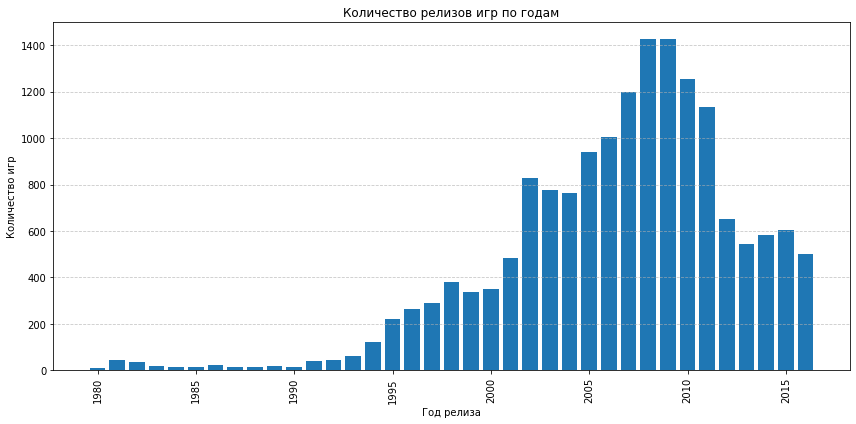

In [25]:
# создадим сводную таблицу и оценим сколько игр выпускалось в разные годы
df_games_release = pd.pivot_table(df, index='year_of_release', values='name', aggfunc='count')

# отобразим данные в виде гистограммы
plt.figure(figsize=(12, 6))
plt.bar(df_games_release.index, df_games_release['name'])
plt.title('Количество релизов игр по годам')
plt.xlabel('Год релиза')
plt.ylabel('Количество игр')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

**Вывод:**

Согласно графику устойчивый **рост** количества релизов игр отмечается с **1994** года, когда количество выпущенных видеоигр достигло сотни и продолжило стремительно увеличиваться с каждым следующим годом вплоть до 2009 включительно.

Наиболее яркие пики приходятся на 2002 — более 800 видеоигр, 2008 и 2009 годы, когда количество релизов превысило годовую отметку в 1400 игр. Вероятно это связано с развитием компьютерных технологий, гейм индустрии, появлением новых приставок и игровых устройств, что повлияло на всплеск интереса к видеоиграм у широкой аудитории.

С **2010** наблюдается **снижение** показателя с каждым годом до 2016. Резкое сокращение выпуска видеоигр отмечается в 2012 году. Возможно ослабление интереса в этой области связано с развитием новой забавы, такой как сматрфон с разнообразием встроенных функций и приложений. В этой связи, прежде широкая аудитория потребителей видеоигр сократилась до истинных ценителей и заядлых геймеров.

В дальнейшем анализе будем оценивать данные, которые приходятся на период не ранее 1994 года, так как до упомянутого года оцениваемый показатель не достигает и 100.

#### Оценим, как менялись продажи по платформам

1. Рассмотрим платформы с наибольшими суммарными продажами и построим распределение по годам. 
2. Оценим за какой характерный срок появляются новые и исчезают старые платформы?

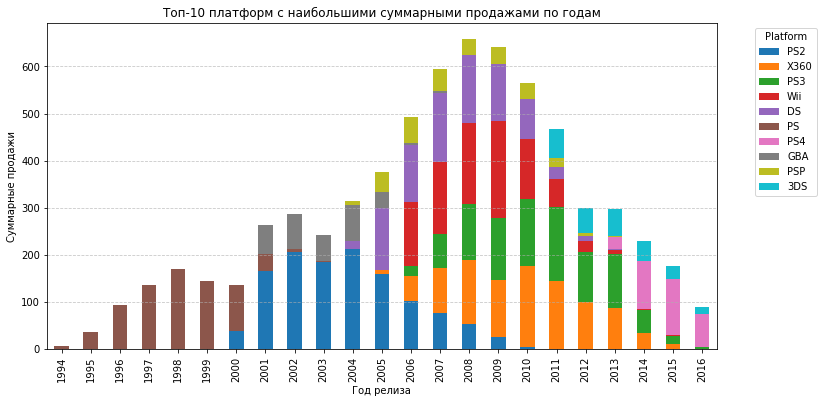

In [26]:
# отфильтруем df, чтобы включить только игры, выпущенные с 1994 года
df_filtered_sales = df[df['year_of_release'] >= 1994]

# создадим сводную таблицу с агрегированными данными суммарных продаж по годам и платформам
df_platform_sales = pd.pivot_table(
    df_filtered_sales,     
    values='total_sales', 
    index='year_of_release', 
    columns='platform',    
    aggfunc='sum'         
)

# отсортируем платформы по убыванию общего объёма продаж за каждый год
df_platform_sales = df_platform_sales[df_platform_sales.sum().sort_values(ascending=False).index]

# выберем топ 10 платформ с наибольшими суммарными продажами по годам
top_10_platforms = df_platform_sales.iloc[:, :10]

# отобразим данные
top_10_platforms.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Топ-10 платформ с наибольшими суммарными продажами по годам')
plt.xlabel('Год релиза')
plt.ylabel('Суммарные продажи')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Platform', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

**Вывод:**

- График показывает, что в период с 1994 по 1999 год единственным представителем из числа игровых платформ с наибольшими суммарными продажами являлась *PS (PlayStation)*.

- *PS2 (PlayStation 2)* наследница *PS* и предшественница *PS3 (PlayStation 3)* зашла на рынок в 2000 году и начала вытеснять *PS*, сохраняя лидирующие позиции до 2005 года, наряду с появлением других конкурентов *GBA (Game Boy Advance)*. В 2010 суммарные продажи *PS2* достигли своего исторического минимума.

- *DS (Nintendo DS)* пополнила ряды представителей игровых платформ с наибольшими суммарными продажами в 2004. В 2005 потеснила *PS2*, разделив лидерство, и продолжила сохранять свои позиции до 2010. В последующие годы суммарные продажи существенно сокращались до почти полного исчезновения.

- Период с 2006 по 2013 представлен наибольшим разнообразием в плане присутствующих на рынке платформ (с наибольшими суммарными продажами) — *PS2*, *X360*, *PS3*, *Wii*, *DS*, *PSP*, *3DS*. При этом суммарные продажи каждой из перечисленных очевидно варьировались. *PS2* в этот период переживала завершающий цикл своего существования. Остальные конкуренты в большинстве своём за этот период прошли цикл от появления до заката.

- В общем плане, характерный срок появления новых и исчезновения старых платформ составляет примерно 10 лет, из которых на актуальный период (основная популярность и продажи) приходится примерно пять лет.

Наиболее свежие данные, которые содержит датасет, заканчиваются 2016 годом. На основании срока характеризующего примерный жизненный цикл игровых платформ и их актуальность, рассмотрим период с 2014 по 2016 год и попробуем обозначить некоторые тенденции в плане того, **какие платформы лидируют по продажам, растут или падают**, а также **выделим несколько потенциально прибыльных платформ** за актуальный период.

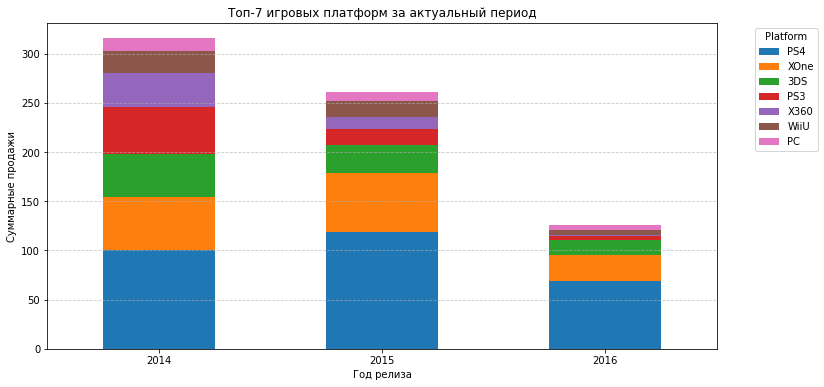

In [27]:
# фильтруем df, чтобы включить только игры, выпущенные с 2014 года
df_actual_platform = df[df['year_of_release'] >= 2014]

# создадим сводную таблицу с агрегированными данными суммарных продаж по годам и платформам
df_platform_trends = pd.pivot_table(
    df_actual_platform,
    values='total_sales',
    index='year_of_release',
    columns='platform',
    aggfunc='sum'
)

# отсортируем платформы по убыванию общего объёма продаж за каждый год
df_platform_trends = df_platform_trends[df_platform_trends.sum().sort_values(ascending=False).index]

# выберем топ 5 платформ с наибольшими суммарными продажами по годам
top_7_platforms = df_platform_trends.iloc[:, :7]

# отобразим данные
top_7_platforms.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Топ-7 игровых платформ за актуальный период')
plt.xlabel('Год релиза')
plt.ylabel('Суммарные продажи')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.legend(title='Platform', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

**Вывод:**

На графике можно заметить определённые тенденции на протяжении актуального периода относительно того, какие платформы лидируют по продажам, растут или падают. В частности:
- *Sony PlayStation 4 (PS4)*, очевидно, приходит на смену своей предшественнице *PS3*.
- *Microsoft Xbox One (XOne)*, по-видимому, также набирает популярность.
- *3DS* — продажи хотя и снижаются, но в целом с объёмом около 15-20 млн. копий платформа приносит прибыль.
- *PS3*, *X360*, *WiiU* и *PC* в отличие от упомянытых выше платформ постепенно уходят, оставляя лидирующие позиции.

**Построим график «ящик с усами»**, чтобы оценить изменчивость общего объёма продаж, медианные продажи, а также рассмотреть  диапазон общих продаж для каждой платформы.

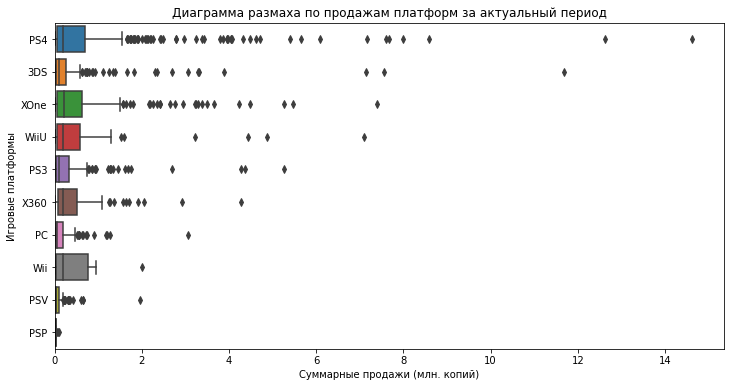

In [28]:
# установим метки для осей графика
xlab = "Суммарные продажи (млн. копий)"
ylab = "Игровые платформы"

# укажем None для пределов, чтобы оценить общую картину
xlim = (0, None)

# укажем название графика
title = "Диаграмма размаха по продажам платформ за актуальный период"

# установим размер графика
plt.figure(figsize=(12, 6))

# построим диаграмму размаха на актуальной выборке
ax = sns.boxplot(x='total_sales', y='platform', data=df_actual_platform)

# установим метки и название
ax.set(xlabel=xlab, ylabel=ylab, xlim=xlim, title=title)

# выведем диаграмму
plt.show()

- Диаграмма показывает, что практически у всех платформ были явные хиты продаж, которые отмечены в виде выбросов.
- Ограничим диапазон продаж до 2 млн. проданных копий, чтобы рассмотреть медианные значения и диапазон общих продаж для каждой платформы.

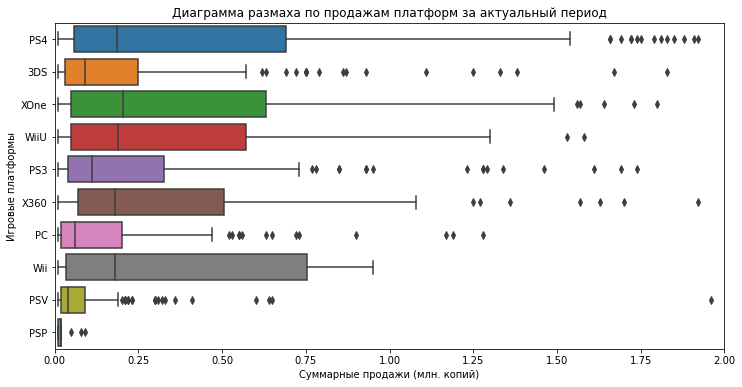

In [29]:
# установим метки для осей графика
xlab = "Суммарные продажи (млн. копий)"
ylab = "Игровые платформы"

# укажем пределы, для более детальной оценки 
xlim = (0, 2)

# укажем название графика
title = "Диаграмма размаха по продажам платформ за актуальный период"

# установим размер графика
plt.figure(figsize=(12, 6))

# построим диаграмму размаха на актуальной выборке
ax = sns.boxplot(x='total_sales', y='platform', data=df_actual_platform)

# установим метки и название
ax.set(xlabel=xlab, ylabel=ylab, xlim=xlim, title=title)

# выведем диаграмму
plt.show()

**Вывод:**

- Платформы с более длинными ящиками указывают на большую изменчивость общего объёма продаж. К таковым относятся игровые приставки *Wii*, *PS4*, *XOne*, *WiiU* и *X360*.
- Более более высокие медианные продажи имеют платформы *XOne*, *PS4* и *Wii*.
- Более более низкие медианные продажи у *PS3*, *3DS* и *PC*.
- Усы дают представление о диапазоне общих продаж для каждой платформы. Так, довольно широкий диапазон охватывают *PS4* — до 155, *XOne* — до 150, и *WiiU* — до 130 миллионов проданных копий. В то время как *PC* не выходят за пределы 50 миллионов проданных копий. Платформы *PSV* и *PSP* находятся в позиции явных отстающих по сравнению с конкурентами.
- Выбросов, которые указывали бы на экстремально низкие продажи за анализируемый период, не обнаружено. При этом практически у всех платформ были явные хиты продаж.

**Оценим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.**

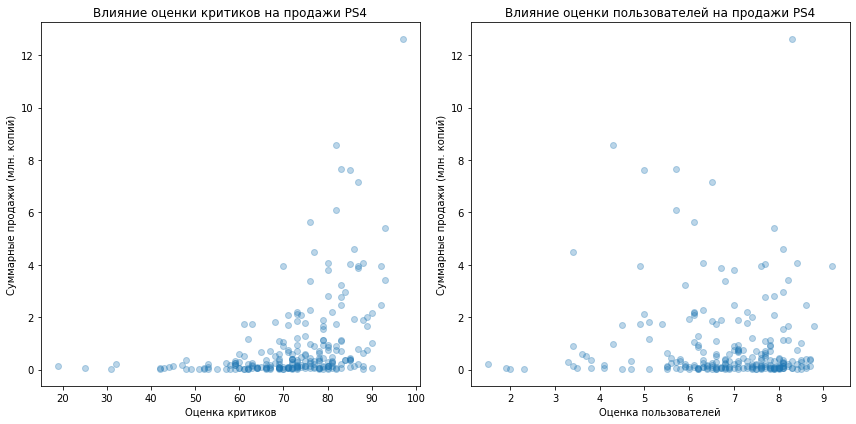

Корреляция продаж и оценки критиков для PS4: 0.402
Корреляция продаж и оценки пользователей для PS4: -0.043


In [30]:
# фильтруем df для одной популярной платформы PS4
df_ps4 = df_actual_platform[
    (df_actual_platform['platform'] == 'PS4') &
    (df_actual_platform['critic_score'] >= 0) &
    (df_actual_platform['user_score'] >= 0)
]

# вычислим коэффициент корреляции чтобы оценить связь между critic_score и total_sales
critic_corr = df_ps4['critic_score'].corr(df_ps4['total_sales'])

# вычислим коэффициент корреляции чтобы оценить связь между user_score и total_sales
user_corr = df_ps4['user_score'].corr(df_ps4['total_sales'])

# отобразим данные
plt.figure(figsize=(12, 6))

# построим диаграмму рассеяния critic_score vs total_sales
plt.subplot(1, 2, 1)
plt.scatter(df_ps4['critic_score'], df_ps4['total_sales'], alpha=0.3)
plt.title(f'Влияние оценки критиков на продажи PS4')
plt.xlabel('Оценка критиков')
plt.ylabel('Суммарные продажи (млн. копий)')

# построим диаграмму рассеяния user_score vs total_sales
plt.subplot(1, 2, 2)
plt.scatter(df_ps4['user_score'], df_ps4['total_sales'], alpha=0.3)
plt.title(f'Влияние оценки пользователей на продажи PS4')
plt.xlabel('Оценка пользователей')
plt.ylabel('Суммарные продажи (млн. копий)')

plt.tight_layout()
plt.show()

# выведем результата корреляции
print(f'Корреляция продаж и оценки критиков для PS4:', round(critic_corr, 3))
print(f'Корреляция продаж и оценки пользователей для PS4:', round(user_corr, 3))

**Вывод:**

- Положительная корреляция предполагает, что по мере увеличения баллов в оценках платфомы со стороны критиков суммарные продажи также имеет тенденцию к увеличению. Другими словами, более высокие **оценки критиков** связаны с более высоким общим объёмом продаж. Значение *0.402* указывает на умеренную положительную корреляцию, то есть взаимосвязь не очень сильная, но все же значимая.
- Значение *-0.043* указывает на очень слабую отрицательную корреляцию и близко к нулю. Это означает, что для этого набора данных между **оценками пользователей** и общим объёмом продаж не существует особой связи.

**Рассмотрим на данных для видеоигр на платформе *PC***.

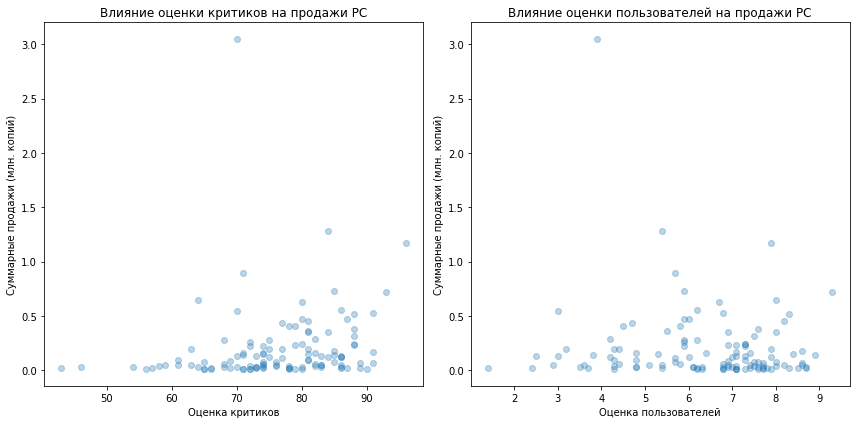

Корреляция продаж и оценки критиков для PC: 0.172
Корреляция продаж и оценки пользователей для PC: -0.09


In [31]:
# фильтруем df для одной популярной платформы PC
df_pc = df_actual_platform[
    (df_actual_platform['platform'] == 'PC') &
    (df_actual_platform['critic_score'] >= 0) &
    (df_actual_platform['user_score'] >= 0)
]

# вычислим коэффициент корреляции чтобы оценить связь между critic_score и total_sales
critic_corr = df_pc['critic_score'].corr(df_pc['total_sales'])

# вычислим коэффициент корреляции чтобы оценить связь между user_score и total_sales
user_corr = df_pc['user_score'].corr(df_pc['total_sales'])

# отобразим данные
plt.figure(figsize=(12, 6))

# построим диаграмму рассеяния critic_score vs total_sales
plt.subplot(1, 2, 1)
plt.scatter(df_pc['critic_score'], df_pc['total_sales'], alpha=0.3)
plt.title(f'Влияние оценки критиков на продажи PC')
plt.xlabel('Оценка критиков')
plt.ylabel('Суммарные продажи (млн. копий)')

# построим диаграмму рассеяния user_score vs total_sales
plt.subplot(1, 2, 2)
plt.scatter(df_pc['user_score'], df_pc['total_sales'], alpha=0.3)
plt.title(f'Влияние оценки пользователей на продажи PC')
plt.xlabel('Оценка пользователей')
plt.ylabel('Суммарные продажи (млн. копий)')

plt.tight_layout()
plt.show()

# выведем результата корреляции
print(f'Корреляция продаж и оценки критиков для PC:', round(critic_corr, 3))
print(f'Корреляция продаж и оценки пользователей для PC:', round(user_corr, 3))

**Вывод:**

Полученные значения близки к нулю. Это означает, что для этого набора данных между общим объёмом продаж и оценками пользователей и критиков не существует особой связи. 

**Далее рассмотрим общее распределение игр по жанрам**

- Что можно сказать о самых прибыльных жанрах? 
- Выделяются ли жанры с высокими и низкими продажами?

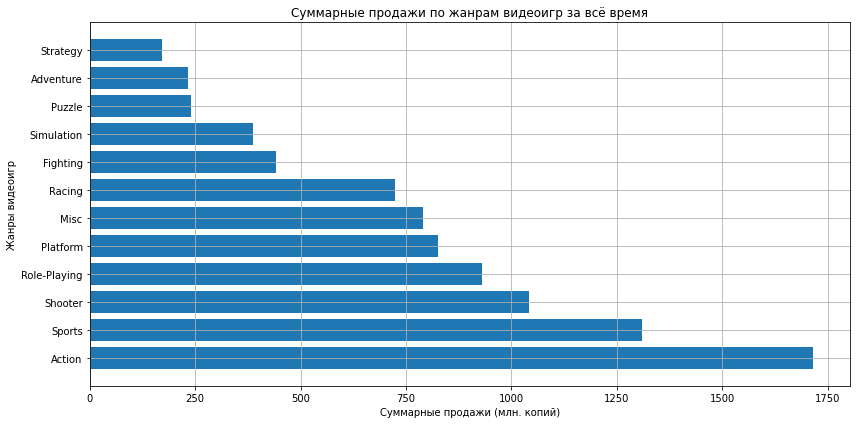

In [32]:
# создадим сводную таблицу с агрегированными данными суммарных продаж по жанрам
df_games_genre = df.pivot_table(
    index='genre',
    values='total_sales',
    aggfunc='sum'
).sort_values('total_sales', ascending=False)

# отобразим данные
plt.figure(figsize=(12, 6))
plt.barh(df_games_genre.index, df_games_genre['total_sales'])
plt.xlabel('Суммарные продажи (млн. копий)')
plt.ylabel('Жанры видеоигр')
plt.title('Суммарные продажи по жанрам видеоигр за всё время')
plt.xticks(rotation=0)
plt.grid()

plt.tight_layout()
plt.show()

**Вывод:**

- Согласно графику, наиболее высокие продажи видеоигр отмечаются по таким жанрам как *Action*, *Sports* и *Shooter*, их продажи насчитывают более 1000 миллионов копий. 
- Жанры *Strategy*, *Adventure*, и *Puzzle* составляют тройку наименее прибыльных среди других жанров видеоигр, их продажи насчитывают до 250 миллионов копий.

**Рассмотрим период с 2012 по 2016 год** и попробуем обозначить некоторые тенденции в плане того, какие жанры лидируют по продажам в этот период.

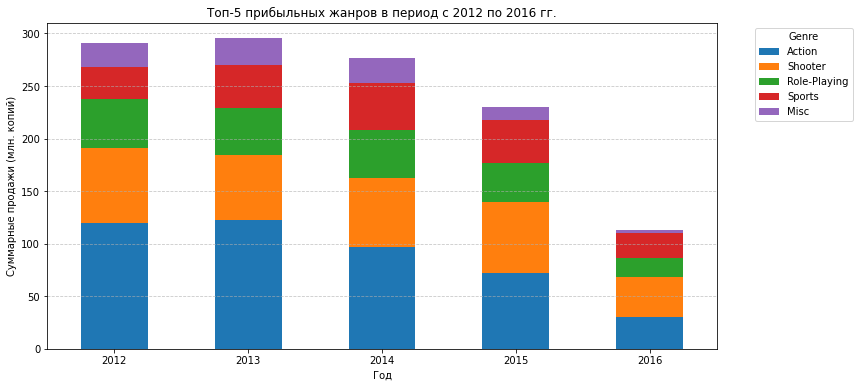

In [33]:
# фильтруем df, чтобы включить данные с 2012 года
df_filtered_genre = df[df['year_of_release'] >= 2012]

# создадим сводную таблицу с агрегированными данными суммарных продаж по годам и жанрам
df_genre_sales = pd.pivot_table(df_filtered_genre, values='total_sales', index='year_of_release', columns='genre', aggfunc='sum')

# отсортируем жанры по убыванию общего объёма продаж за каждый год
df_genre_sales = df_genre_sales[df_genre_sales.sum().sort_values(ascending=False).index]

# выберем топ 5 жанров с наибольшими суммарными продажами по годам
top_5_genre = df_genre_sales.iloc[:, :5]

# отобразим данные
top_5_genre.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Топ-5 прибыльных жанров в период с 2012 по 2016 гг.')
plt.xlabel('Год')
plt.ylabel('Суммарные продажи (млн. копий)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

**Вывод:**

В период с 2012 по 2016 год порядок жанров-лидеров немного поменялся:
- Первенство по продажам сохраняет жанр *Action*.
- На одну ступень в рейтинге поднялись жанры *Shooter*, *Role-Playing* и *Music*.
- Со второго на четвёртое место в рейтинге спустился *Sports*.

В целом, жанры *Shooter* и *Sports* выглядят более стабильными в плане прибыльности в отличии от *Misc* и *Action*.

**Построим диаграмму размаха**, чтобы оценить медианные продажи, рассмотреть изменчивость и диапазон общих продаж по жанрам. 

Рассмотрим более актуальный период с 2014 по 2016 год.

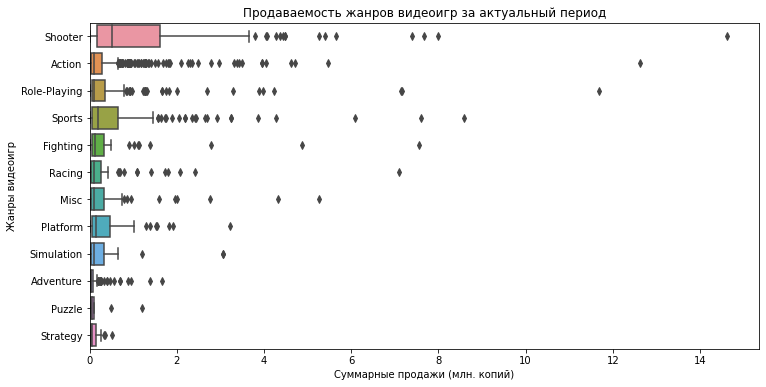

In [34]:
# установим метки для осей графика
xlab = "Суммарные продажи (млн. копий)"
ylab = "Жанры видеоигр"

# укажем None для пределов, чтобы оценить общую картину
xlim = (0, None)

# укажем название графика
title = "Продаваемость жанров видеоигр за актуальный период"

# установим размер графика
plt.figure(figsize=(12, 6))

# построим диаграмму размаха на актуальной выборке
ax = sns.boxplot(x='total_sales', y='genre', data=df_actual_platform)

# установим метки и название
ax.set(xlabel=xlab, ylabel=ylab, xlim=xlim, title=title)

# выведем диаграмму
plt.show()

- Диаграмма показывает, что практически у всех жанров игр были явные хиты продаж, которые отмечены в виде выбросов.
- Ограничим диапазон продаж до 4 млн. проданных копий, чтобы рассмотреть медианные значения и диапазон общих продаж для каждого жанра.

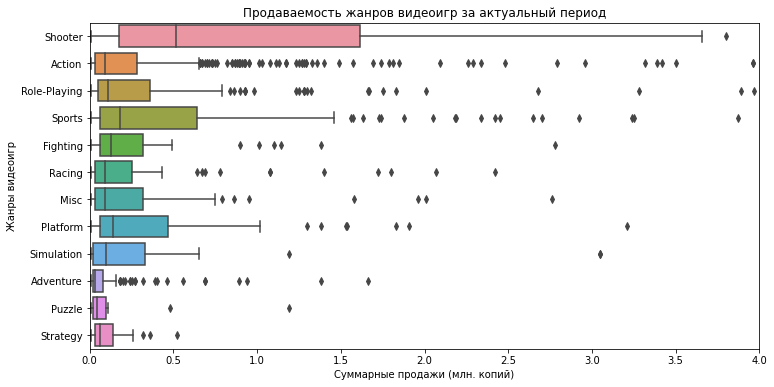

In [35]:
# установим метки для осей графика
xlab = "Суммарные продажи (млн. копий)"
ylab = "Жанры видеоигр"

# укажем пределы, для более детальной оценки 
xlim = (0, 4)

# укажем название графика
title = "Продаваемость жанров видеоигр за актуальный период"

# установим размер графика
plt.figure(figsize=(12, 6))

# построим диаграмму размаха на актуальной выборке
ax = sns.boxplot(x='total_sales', y='genre', data=df_actual_platform)

# установим метки и название
ax.set(xlabel=xlab, ylabel=ylab, xlim=xlim, title=title)

# выведем диаграмму
plt.show()

**Вывод:**

- Жанры с более длинными ящиками указывают на большую изменчивость общего объёма продаж. К таковым можно отнести игры в жанрах *Shooter* и *Sports*.
- С высокими медианными продажами в очевидных лидерах отмечается *Shooter*, за которым следует *Sports*.
- Указанные жанры также охватывают довольно широкий диапазон общих продаж — до 3.7 для *Shooter*, и до 1.5 миллионов проданных копий для *Sports*. 
- Игры в жанре *Action* лидируют по количеству выбросов, которые указывают на наличие экстремально высоких продаж за анализируемый период. По всей видимости жанр *Action* занимает первенство в рейтинге суммарных продаж за счёт крайне популярных игр-хитов.

### Шаг 4. Составление портрета пользователя каждого региона

#### Определим для пользователя каждого региона (NA, EU, JP) топ-5 популярных платформ

In [36]:
# создадим сводную таблицу с агрегированными данными продаж по NA региону
na_platform_sales = df_actual_platform.pivot_table(index = 'platform', values = 'na_sales', aggfunc = 'sum').sort_values('na_sales', ascending = False)
na_platform_sales['%'] = na_platform_sales['na_sales'] / na_platform_sales['na_sales'].sum() * 100

# выбираем топ-5 платформ с высоким продажами
na_top_platform = na_platform_sales.head(5)
# невошедшее в топ-5 объединим в категорию "другие"
na_other_platform = na_platform_sales.iloc[5:].sum()
na_other_platform.name = 'Other' 
# объединим два датафрейма
na_res_platform = pd.concat([na_top_platform, na_other_platform.to_frame().T])

In [37]:
# создадим сводную таблицу с агрегированными данными продаж по EU региону
eu_platform_sales = df_actual_platform.pivot_table(index = 'platform', values = 'eu_sales', aggfunc = 'sum').sort_values('eu_sales', ascending = False)
eu_platform_sales['%'] = eu_platform_sales['eu_sales'] / eu_platform_sales['eu_sales'].sum() * 100

# выбираем топ-5 платформ с высоким продажами
eu_top_platform = eu_platform_sales.head(5)
# невошедшее в топ-5 объединим в категорию "другие"
eu_other_platform = eu_platform_sales.iloc[5:].sum()
eu_other_platform.name = 'Other' 
# объединим два датафрейма
eu_res_platform = pd.concat([eu_top_platform, eu_other_platform.to_frame().T])

In [38]:
# создадим сводную таблицу с агрегированными данными продаж по JP региону
jp_platform_sales = df_actual_platform.pivot_table(index = 'platform', values = 'jp_sales', aggfunc = 'sum').sort_values('jp_sales', ascending = False)
jp_platform_sales['%'] = jp_platform_sales['jp_sales'] / jp_platform_sales['jp_sales'].sum() * 100

# выбираем топ-5 платформ с высоким продажами
jp_top_platform = jp_platform_sales.head(5)
# невошедшее в топ-5 объединим в категорию "другие"
jp_other_platform = jp_platform_sales.iloc[5:].sum()
jp_other_platform.name = 'Other' 
# объединим два датафрейма
jp_res_platform = pd.concat([jp_top_platform, jp_other_platform.to_frame().T])

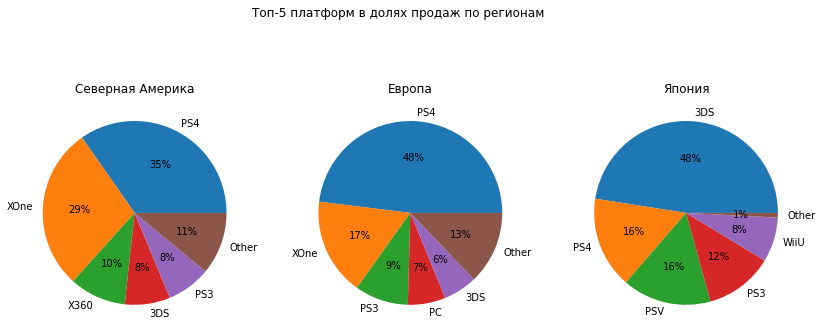

In [39]:
# строим круговые диаграммы по каждому региону
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 6))

fig.suptitle('Топ-5 платформ в долях продаж по регионам')
ax1.pie(na_res_platform['na_sales'], labels=na_res_platform.index, autopct='%1.0f%%', normalize=True)
ax1.set_title('Северная Америка')
ax2.pie(eu_res_platform['eu_sales'], labels=eu_res_platform.index, autopct='%1.0f%%', normalize=True)
ax2.set_title('Европа')
ax3.pie(jp_res_platform['jp_sales'], labels=jp_res_platform.index, autopct='%1.0f%%', normalize=True)
ax3.set_title('Япония')

plt.show()

**Вывод:**

На графиках заметны региональные различия в долях продаж игровых платформ по оценке пяти самых популярных:
- В **Северной Америке** бо́льшую часть рынка занимают *PS4 (35 %)* и *XOne (29 %)*. На долю *X360* приходится *10 %*. Менее всего представлены *3DS* и *PS3*.
- Около половины рынка **Европы** занимает *PS4 (48 %)*. На втором месте *XOne (17 %)*. Наименьшие доли занимают *PC (7 %)* и *3DS (6 %)*.
- **Япония**, в отличии от двух предыдущих регионов, своим фаворитом выделяет *3DS*, на долю которого приходится *48 %* рынка. По *16 %* занимают *PS4* и *PSV*. Наименьшая доля у *WiiU (8 %)*.

#### Определим для пользователя каждого региона (NA, EU, JP) топ-5 популярных жанров

In [40]:
# создадим сводную таблицу с агрегированными данными продаж по NA региону
na_genre_sales = df_actual_platform.pivot_table(index = 'genre', values = 'na_sales', aggfunc = 'sum').sort_values('na_sales', ascending = False)
na_genre_sales['%'] = na_genre_sales['na_sales'] / na_genre_sales['na_sales'].sum() * 100

# выбираем топ-5 жанров с высоким продажами
na_top_genre = na_genre_sales.head(5)
# невошедшее в топ-5 объединим в категорию "другие"
na_other_genre = na_genre_sales.iloc[5:].sum()
na_other_genre.name = 'Other' 
# объединим два датафрейма
na_res_genre = pd.concat([na_top_genre, na_other_genre.to_frame().T])

In [41]:
# создадим сводную таблицу с агрегированными данными продаж по EU региону
eu_genre_sales = df_actual_platform.pivot_table(index = 'genre', values = 'eu_sales', aggfunc = 'sum').sort_values('eu_sales', ascending = False)
eu_genre_sales['%'] = eu_genre_sales['eu_sales'] / eu_genre_sales['eu_sales'].sum() * 100

# выбираем топ-5 жанров с высоким продажами
eu_top_genre = eu_genre_sales.head(5)
# невошедшее в топ-5 объединим в категорию "другие"
eu_other_genre = eu_genre_sales.iloc[5:].sum()
eu_other_genre.name = 'Other' 
# объединим два датафрейма
eu_res_genre = pd.concat([eu_top_genre, eu_other_genre.to_frame().T])

In [42]:
# создадим сводную таблицу с агрегированными данными продаж по JP региону
jp_genre_sales = df_actual_platform.pivot_table(index = 'genre', values = 'jp_sales', aggfunc = 'sum').sort_values('jp_sales', ascending = False)
jp_genre_sales['%'] = jp_genre_sales['jp_sales'] / jp_genre_sales['jp_sales'].sum() * 100

# выбираем топ-5 жанров с высоким продажами
jp_top_genre = jp_genre_sales.head(5)
# невошедшее в топ-5 объединим в категорию "другие"
jp_other_genre = jp_genre_sales.iloc[5:].sum()
jp_other_genre.name = 'Other' 
# объединим два датафрейма
jp_res_genre = pd.concat([jp_top_genre, jp_other_genre.to_frame().T])

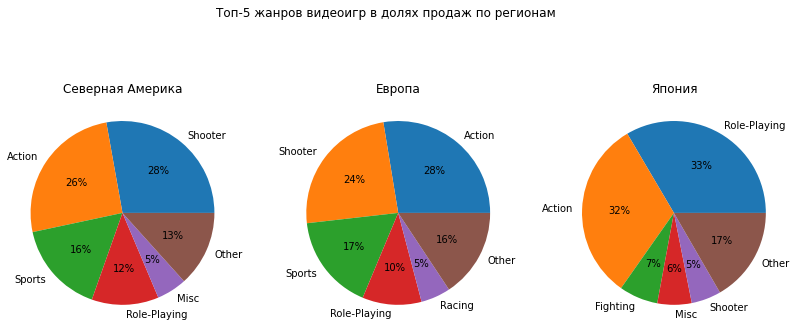

In [43]:
# строим круговые диаграммы по каждому региону
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 6))

fig.suptitle('Топ-5 жанров видеоигр в долях продаж по регионам')
ax1.pie(na_res_genre['na_sales'], labels=na_res_genre.index, autopct='%1.0f%%', normalize=True)
ax1.set_title('Северная Америка')
ax2.pie(eu_res_genre['eu_sales'], labels=eu_res_genre.index, autopct='%1.0f%%', normalize=True)
ax2.set_title('Европа')
ax3.pie(jp_res_genre['jp_sales'], labels=jp_res_genre.index, autopct='%1.0f%%', normalize=True)
ax3.set_title('Япония')

plt.show()

**Вывод:**

Диаграммы показывают региональные различия в долях продаж жанров видеоигр по оценке пяти самых популярных:
- Бо́льшая доля рынка **Северной Америки** распределена между таким жанрам как *Shooter (28 %)* и *Action (26 %)*. Игры в жанре *Sports* занимают *16 %*. К наименее популярным среди топ-5 можно отнести *Role-Playing (11 %)* и *Misc (5 %)*.
- В плане жанровых предпочтений рынок **Европы** очень похож на рынок Северной Америки.
- **Япония**, в отличии от двух предыдущих регионов, своим жанровым фаворитом предпочитает *Role-Playing (33 %)* и *Action (32 %)*. Среди топ-5 жанров, *Shooter* представляет наименьший интерес у японских пользователей — всего *5 %* рынка, что опять же сильно отличает японский регион от двух предыдущих.

Вместе с тем, высокое предпочтение жанра *Action* объединят пользователей всех трёх регионов.

#### Оценим влияет ли рейтинг ESRB на продажи в отдельном регионе

*Совет по рейтингу развлекательного программного обеспечения (ESRB)* — это саморегулируемая организация, ответственная за присвоение возрастных и контентных рейтингов видеоиграм и мобильным приложениям в США и Канаде. Эти рейтинги созданы для того, чтобы предоставить потребителям, особенно родителям, информацию о содержании и пригодности игры для разных возрастных групп.

ESRB присваивает играм один из следующих возрастных рейтингов:

- «EC» (раннее детство): игры, подходящие для маленьких детей.
- «E» (все): игры, подходящие для всех возрастов.
- «E10+» (все от 10 лет): игры, подходящие для детей от 10 лет и старше.
- «T» (подросток): игры, подходящие для детей от 13 лет и старше.
- «М» (для взрослых): игры, подходящие для детей от 17 лет и старше.
- «AO» (только для взрослых): игры, предназначенные для взрослых от 18 лет и старше.

**Рассмотрим период с 2014 по 2016 год**, чтобы составить представление о том, как продажи распределяются для разных рейтингов ESRB в каждом регионе за актуальный период.

In [44]:
# создадим сводную таблицу с агрегированными данными продаж по NA региону
na_rating_sales = df_actual_platform.pivot_table(index = 'rating', values = 'na_sales', aggfunc = 'sum').sort_values('na_sales', ascending = False)
na_rating_sales['%'] = na_rating_sales['na_sales'] / na_rating_sales['na_sales'].sum() * 100

# выбираем топ-5 продаж в отношении рейтингов ESRB
na_top_rating = na_rating_sales.head(5)
# невошедшее в топ-5 объединим в категорию "другие"
na_other_rating = na_rating_sales.iloc[5:].sum()
na_other_rating.name = 'Other' 
# объединим два датафрейма
na_res_rating = pd.concat([na_top_rating, na_other_rating.to_frame().T])

In [45]:
# создадим сводную таблицу с агрегированными данными продаж по EU региону
eu_rating_sales = df_actual_platform.pivot_table(index = 'rating', values = 'eu_sales', aggfunc = 'sum').sort_values('eu_sales', ascending = False)
eu_rating_sales['%'] = eu_rating_sales['eu_sales'] / eu_rating_sales['eu_sales'].sum() * 100

# выбираем топ-5 продаж в отношении рейтингов ESRB
eu_top_rating = eu_rating_sales.head(5)
# невошедшее в топ-5 объединим в категорию "другие"
eu_other_rating = eu_rating_sales.iloc[5:].sum()
eu_other_rating.name = 'Other' 
# объединим два датафрейма
eu_res_rating = pd.concat([eu_top_rating, eu_other_rating.to_frame().T])

In [46]:
# создадим сводную таблицу с агрегированными данными продаж по JP региону
jp_rating_sales = df_actual_platform.pivot_table(index = 'rating', values = 'jp_sales', aggfunc = 'sum').sort_values('jp_sales', ascending = False)
jp_rating_sales['%'] = jp_rating_sales['jp_sales'] / jp_rating_sales['jp_sales'].sum() * 100

# выбираем топ-5 продаж в отношении рейтингов ESRB
jp_top_rating = jp_rating_sales.head(5)
# невошедшее в топ-5 объединим в категорию "другие"
jp_other_rating = jp_rating_sales.iloc[5:].sum()
jp_other_rating.name = 'Other' 
# объединим два датафрейма
jp_res_rating = pd.concat([jp_top_rating, jp_other_rating.to_frame().T])

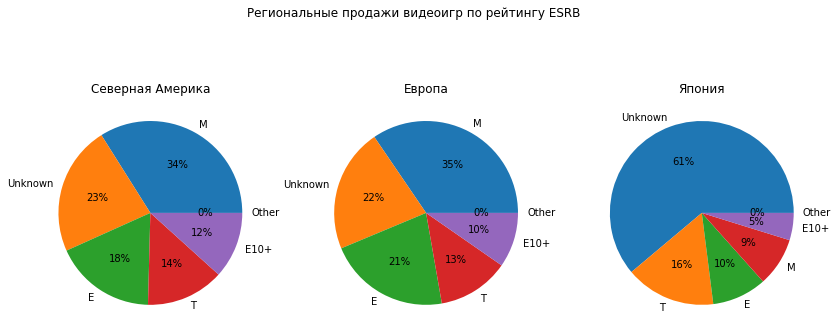

In [47]:
# строим круговые диаграммы по каждому региону
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 6))

fig.suptitle('Региональные продажи видеоигр по рейтингу ESRB')
ax1.pie(na_res_rating['na_sales'], labels=na_res_rating.index, autopct='%1.0f%%', normalize=True)
ax1.set_title('Северная Америка')
ax2.pie(eu_res_rating['eu_sales'], labels=eu_res_rating.index, autopct='%1.0f%%', normalize=True)
ax2.set_title('Европа')
ax3.pie(jp_res_rating['jp_sales'], labels=jp_res_rating.index, autopct='%1.0f%%', normalize=True)
ax3.set_title('Япония')

plt.show()

**Вывод:**

На диаграммах можно видеть как продажи распределяются для разных рейтингов ESRB в каждом регионе за актуальный период:
- В регионах **Северной Америки** и **Европы** наблюдаются схожие тенденции по распределению продаж для разных рейтингов ESRB. Наибольшая часть продаж приходится на игры, подходящие для детей от 17 лет и старше *M* — *34 % и 35 %* соответственно. Наименьшую долю рынка в обоих регионах занимают игры, подходящие для детей от 10 лет и старше *E10+* — *12 % и 10 %* соответственно.
- Очевидным отличием для **Японии**, можно выделить большой процент не маркированных игр. В частности, категории *Unknown — 61 %*, которой мы заполнили пропущенные значения на этапе предобработки данных. Такое распределение вполне объяснимо, ведь система рейтингов ESRB создана в США и Канаде и распространяется на видеоигры производимые в этих странах. Кроме того, как мы выяснили ранее, японский рынок очень регионально ориентирован, пользователи отдают предпчтение видеоиграм локальных производителей, которые, вероятно, не подлежат регламенту ESRB.

### Шаг 5. Проверка гипотез

#### Можно ли сказать, что средние пользовательские рейтинги платформ *Xbox One* и *PC* одинаковые?

Проверим гипотезу о том, что средние пользовательские рейтинги платформ *Xbox One* и *PC* одинаковые.

- *Нулевая гипотеза:* средние значения рейтинга пользователей платформ *Xbox One* и *PC* равны.
- *Альтернативная гипотеза:* средние значения рейтинга пользователей платформ *Xbox One* и *PC* не равны.

Исходя из общей гипотезы, выбор двусторонней альтернативной гипотезы, т.е. *не равны* будет разумен. Таким образом можно установить, равны ли средние значения двух выборок или нет при заданном уровне значимости.

In [48]:
# создадим датасеты с выборками для сравнения 
# учтём условия, что платформа 'XOne' вышла на рынок в 2013 году
df_user_score_pc = df[(df['platform'] == 'PC') & (df['user_score'] >= 0) & (df['year_of_release'] >= 2013)]['user_score']
df_user_score_xone = df[(df['platform'] == 'XOne') & (df['user_score'] >= 0)]['user_score']

# оценим равны ли выборки по размеру между собой
print('Количество наблюдений для PC:', df_user_score_pc.shape[0])
print('Количество наблюдений для Xbox One:', df_user_score_xone.shape[0])

Количество наблюдений для PC: 155
Количество наблюдений для Xbox One: 182


Выборки разного размера и есть некоторые сомнения, что дисперсии у двух генеральных совокупностей одинаковые. Поэтому укажем параметр `equal_var=False`, чтобы тест посчитал дисперсии выборок по отдельности.

In [49]:
# для наглядной оценки выведем среднее значение для обоих датасетов
print('Среднее значение оценок пользователей PC:', round(df_user_score_pc.mean(), 2))
print('Среднее значение оценок пользователей Xbox One:', round(df_user_score_xone.mean(), 2))

# задаём уровень значимости
alpha = 0.05

# проводим ttest для двух выборок, проверяем двустороннюю альтернативную гипотезу 
res_user_score_platform = st.ttest_ind(df_user_score_pc, df_user_score_xone, equal_var=False)

print(f'p-value: {res_user_score_platform.pvalue}')

# проверяем p-value
if res_user_score_platform.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

Среднее значение оценок пользователей PC: 6.27
Среднее значение оценок пользователей Xbox One: 6.52
p-value: 0.14759594013430463
Нет оснований отвергнуть нулевую гипотезу


**Вывод:**

- Результаты теста показывают, что хотя средние оценки пользователей платформ *Xbox One* и *PC* и не одинаковы, с вероятностью почти в 15% такое или больше различие можно получить случайно. Это довольно большая вероятность, чтобы делать вывод о значимом различии между оценками пользователей платформ *Xbox One* и *PC*.
- Значение p-value меньше уровня статистической значимости, значит нет оснований отвергнуть нулевую гипотезу о том, что средние пользовательские рейтинги платформ *Xbox One* и *PC* одинаковые.

#### Можно ли сказать, что средние пользовательские рейтинги жанров *Action* и *Sports* разные?

Несмотря на то, что формулировать гипотезы можно различными способами, проверка нулевой гипотезы всегда проводится в точке равенства. Исходя из общей гипотезы, проведём двусторонний тест и проверим двустороннюю альтернативную гипотезу, которая предполагает возможное отклонение и в большую, и в меньшую стороны.

- *Нулевая гипотеза:* средние пользовательские рейтинги жанров *Action* и *Sports* равны.
- *Альтернативная гипотеза:* средние пользовательские рейтинги жанров *Action* и *Sports* не равны.

In [50]:
# создадим датасеты с выборками для сравнения
df_user_score_аction = df[(df['genre'] == 'Action') & (df['user_score'] >= 0)]['user_score']
df_user_score_sports = df[(df['genre'] == 'Sports') & (df['user_score'] >= 0)]['user_score']

# оценим равны ли выборки по размеру между собой
print('Количество наблюдений для Action:', df_user_score_аction.shape[0])
print('Количество наблюдений для Sports:', df_user_score_sports.shape[0])

Количество наблюдений для Action: 1796
Количество наблюдений для Sports: 1080


Размер выборок различается, есть сомнения, что дисперсии у двух генеральных совокупностей одинаковые. Поэтому укажем параметр `equal_var=False`, для рассчёта дисперсии выборок по отдельности.

In [51]:
# для наглядной оценки выведем среднее значение для обоих датасетов
print('Среднее значение оценок пользователей для Action:', round(df_user_score_аction.mean(), 2))
print('Среднее значение оценок пользователей для Sports:', round(df_user_score_sports.mean(), 2))

# задаём уровень значимости
alpha = 0.05

# проводим ttest для двух выборок, в качестве альтернативной используем двустороннюю гипотезу
res_user_score_genre = st.ttest_ind(df_user_score_аction, df_user_score_sports, equal_var=False)

print(f'Значение p-value: {res_user_score_genre.pvalue}')

# проверяем p-value
if res_user_score_genre.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

Среднее значение оценок пользователей для Action: 7.06
Среднее значение оценок пользователей для Sports: 6.95
Значение p-value: 0.07751671595536254
Нет оснований отвергнуть нулевую гипотезу


**Вывод:**

- Значение p *(~ 0.077)* превышает установленный для проверки уровень значимости 0.05 (5%). Это предполагает, что наблюдаемый результат с достаточной вероятностью возникнет случайно, если нулевая гипотеза верна.
- Следовательно, у нас нет убедительных доказательств отклонения нулевой гипотезы, поэтому есть основания говорить, что средние пользовательские рейтинги жанров *Action* и *Sports* равны.

### Шаг 6. Общий вывод

На архивных данных о продажах игр, оценках пользователей и экспертов, жанрах и популярности игровых платформ было проведено исследование с **целью** выявить определяющие успешность игры закономерности и проверить ряд предположений. Результаты анализа будут учитываться в реализации дальнейших стратегий развития бизнеса, при выборе потенциально популярного продукта и планировании рекламных кампаний.

Работа включала предварительный этап и собственно исследование.

На **предварительном этапе** мы изучили основные сведения о датафрейме с последующей предобработкой, в частности: определили количество и тип данных в таблице, привели названия столбцов к единому стилю, проверили данные на наличие дубликатов, оценили долю пропущенных значений по каждому столбцу, чтобы предупредить риски возможных потерь, обработали пропуски с применением наиболее оптимальных способов, изменили тип значений в некоторых столбцах, добавили в таблицу новый столбец с нужными значениями для дальнейшего ислледования и убедились, что все данные отображаются корректно.

На **этапе иследования** мы провели анализ данных с использованием релевантных методов и подходов, что позволило ответить на ряд исследовательских вопросов.

**1) Какие игровые платформы имели наибольшую популярность в плане продаж в разные периоды?** 

- В период **с 1994 по 1999** год единственным представителем из числа игровых платформ с наибольшими суммарными продажами являлась *PS (PlayStation)*.
- *PS2 (PlayStation 2)* наследница *PS* и предшественница *PS3 (PlayStation 3)* зашла на рынок **в 2000** году и начала вытеснять *PS*, сохраняя лидирующие позиции до 2005 года, наряду с появлением других конкурентов *GBA (Game Boy Advance)*. В 2010 суммарные продажи *PS2* достигли своего исторического минимума.
- В **2004** *DS (Nintendo DS)* пополнила ряды представителей игровых платформ с наибольшими суммарными продажами. В 2005 потеснила *PS2*, разделив лидерство, и продолжила сохранять свои позиции до 2010 года. В последующие годы суммарные продажи существенно сокращались.
- Период с **2006 по 2013** представлен наибольшим разнообразием в плане присутствующих на рынке платформ (с наибольшими суммарными продажами) — *PS2*, *X360*, *PS3*, *Wii*, *DS*, *PSP*, *3DS*. При этом суммарные продажи каждой из перечисленных существенно варьировались. *PS2* в этот период переживала завершающий цикл своего существования. Остальные конкуренты в большинстве своём за этот период прошли цикл от появления до заката.
- В целом, **с 2010 по 2016** наблюдается сокращение количества релизов игр. Резкое сокращение выпуска видеоигр отмечается в 2012 году. Возможно ослабление интереса в этой области связано с развитием новой забавы, такой как сматрфон с разнообразием встроенных функций и приложений. В этой связи, прежде широкая аудитория потребителей видеоигр сократилась до истинных ценителей и заядлых геймеров.

**2) За какой характерный срок появляются новые и исчезают старые платформы?** 

В общем плане, характерный срок появления новых и исчезновения старых платформ составляет примерно 10 лет, из которых на актуальный период (основная популярность и продажи) приходится примерно пять лет.

**3) Какие платформы лидируют по продажам, растут или падают?**

На основании срока характеризующего примерный жизненный цикл игровых платформ и их актуальность, был рассмотрен период с 2014 по 2016 год. Отмечены следующие тенденции:

- *Sony PlayStation 4 (PS4)* — лидер, сменивший предшественницу *PS3*, которая в свою очередь, вторая по продажам за указанный период.
- *Microsoft Xbox One (XOne)* — занимает второе место и также набирает популярность.
- *3DS* — продажи хотя и снижаются, но в целом с объёмом около 15-20 млн. копий платформа приносит прибыль.
- *PS3*, *X360*, *WiiU* и *PC* в отличие от упомянытых выше платформ постепенно уходят, оставляя лидирующие позиции.

В общем плане продаж:

- К платформам с большей **изменчивостью общего объема продаж** можно отнести *Wii*, *PS4*, *XOne*, *WiiU* и *X360*.
- Более более высокие **медианные продажи** имеют платформы *XOne*, *PS4* и *Wii*, более низкие — у *PS3*, *3DS* и *PC*.
- Довольно широкий **диапазон общих продаж** охватывают *PS4* — до 155, *XOne* — до 150, и *WiiU* — до 130 миллионов проданных копий. В то время как *PC* не выходят за пределы 50 миллионов проданных копий. Платформы *PSV* и *PSP* находятся в позиции явных отстающих по сравнению с конкурентами.
- Выбросов, которые указывали бы на экстремально низкие продажи за анализируемый период, не обнаружено. При этом практически у всех платформ были явные хиты продаж.

**4) Как влияют отзывы пользователей и критиков на продажи внутри одной популярной платформы?**

- Более высокие **оценки критиков** связаны с более высоким общим объёмом продаж *(на примере PS4)*. Значение *0.402* указывает на умеренную положительную корреляцию, то есть взаимосвязь не очень сильная, но все же значимая.
- Значение *-0.043* указывает на очень слабую отрицательную корреляцию и близко к нулю. Это означает, что для этого набора данных **оценки пользователей** не позволяют точно предсказать изменения общего объёма продаж.

**5) Выделяются ли жанры с высокими и низкими продажами?**

- Наиболее высокие продажи видеоигр отмечаются по таким жанрам как *Action*, *Sports* и *Shooter*, их продажи насчитывают более 1000 миллионов копий. 
- Жанры *Strategy*, *Adventure*, и *Puzzle* составляют тройку наименее прибыльных среди других жанров видеоигр, их продажи насчитывают до 250 миллионов копий.

**6) Какими особенностями представлен портрет пользователей игровых платформ из Северной Америки, Европы и Японии?**

*Региональные различия в долях продаж игровых платформ по оценке пяти самых популярных:*

- В **Северной Америке** бо́льшую часть рынка занимают *PS4 (35 %)* и *XOne (29 %)*. На долю *X360* приходится *10 %*. Менее всего представлены *3DS* и *PS3*.
- Около половины рынка **Европы** занимает *PS4 (48 %)*. На втором месте *XOne (17 %)*. Наименьшие доли занимают *PC (7 %)* и *3DS (6 %)*.
- **Япония**, в отличии от двух предыдущих регионов, своим фаворитом выделяет *3DS*, на долю которого приходится *48 %* рынка. По *16 %* занимают *PS4* и *PSV*. Наименьшая доля у *WiiU (8 %)*.

*Региональные различия в долях продаж жанров видеоигр по оценке пяти самых популярных:*

- Бо́льшая доля рынка **Северной Америки** распределена между таким жанрам как *Shooter (28 %)* и *Action (26 %)*. Игры в жанре *Sports* занимают *16 %*. К наименее популярным среди топ-5 можно отнести *Role-Playing (11 %)* и *Misc (5 %)*.
- В плане жанровых предпочтений рынок **Европы** очень похож на рынок Северной Америки.
- **Япония**, в отличии от двух предыдущих регионов, своим жанровым фаворитом предпочитает *Role-Playing (33 %)* и *Action (32 %)*. Среди топ-5 жанров, *Shooter* представляет наименьший интерес у японских пользователей — всего *5 %* рынка, что опять же сильно отличает японский регион от двух предыдущих.

Вместе с тем, высокое предпочтение жанра *Action* объединят пользователей всех трёх регионов.

*Распределение продаж для разных рейтингов ESRB в каждом регионе:*

- В регионах **Северной Америки** и **Европы** наблюдаются схожие тенденции по распределению продаж для разных рейтингов ESRB. Наибольшая часть продаж приходится на игры, подходящие для детей от 17 лет и старше *M* — *34 % и 35 %* соответственно. Наименьшую долю рынка в обоих регионах занимают игры, подходящие для детей от 10 лет и старше *E10+* — *12 % и 10 %* соответственно.
- Очевидным отличием для **Японии**, можно выделить большой процент не маркированных игр. В частности, категории *Unknown — 61 %*, которой мы заполнили пропущенные значения на этапе предобработки данных. Такое распределение вполне объяснимо, ведь система рейтингов ESRB создана в США и Канаде и распространяется на видеоигры производимые в этих странах. Кроме того, как мы выяснили ранее, японский рынок очень регионально ориентирован, пользователи отдают предпчтение видеоиграм локальных производителей, которые, вероятно, не подлежат регламенту ESRB.

**7) Можно ли сказать, что средние пользовательские рейтинги платформ *Xbox One* и *PC* одинаковые?**

Результаты статистической проверки не дают основания отвергнуть это предположение. По всей видимости, средние пользовательские рейтинги платформ *Xbox One* и *PC* находятся в равных пределах.

**8) Можно ли сказать, что средние пользовательские рейтинги жанров *Action* и *Sports* разные?**

Согласно данным, есть основания говорить, что средние пользовательские рейтинги жанров *Action* и *Sports* равны.

По результатам проведенного исследования можно заключить, что понимание выявленных деталей и закономерностей является крайне важным при выборе потенциально популярного продукта и планировании рекламных кампаний бизнеса.